# CoronaInDeStad.nl Web Crawler

Web crawler for the website coronaindestad.nl

## 1. Retrieve html documents from website

In [1]:
from bs4 import BeautifulSoup
import os
import requests
import sys
import time

In [2]:
# URL = "https://www.coronaindestad.nl/small-poetic-sonic-events-2/" # De collectie
# URL = "https://www.coronaindestad.nl/meervaart-brief-van-floris-van-delft/" # De tentoonstelling
# URL = "https://www.coronaindestad.nl/corona-getuigenissen-verhaal-yurdakul/?h=3364" # Veerkrachtige verhalen uit Amsterdam-West
# URL = "https://www.coronaindestad.nl/van-corona-naar-familie-k/" # Over de tentoonstellin / de gehele collectie
# URL = "https://www.coronaindestad.nl/onderweg-naar-de-datsja/" # texts only
# URL = "https://www.coronaindestad.nl/knuffelen/" # De tentoonstelling
# URL = "https://www.coronaindestad.nl/sound-of-silence-chin-chin-club/" # Corona in de stad
URL = "https://www.coronaindestad.nl/rvdk-ronald-van-der-kemp-army-of-love-surrender-to-a-sustainble-future/"

In [11]:
# Zaaloverzicht
URL = "https://www.coronaindestad.nl/corona-en-de-jeugd/" # Zaaloverzicht
URL = "https://www.coronaindestad.nl/the-world-after-3-the-world-after/"
URL = "https://www.coronaindestad.nl/frigiti-tori-untold-stories-shared-history-muriel-3/"
URL = "https://www.coronaindestad.nl/schrijven-naar-de-toekomst-laurens-en-petra-de-boer-amsterdam-en-ijmuiden/?h=3440"
URL = "https://www.coronaindestad.nl/psychiatire-in-de-stad-een-nieuwsbrief/"
URL = "https://www.coronaindestad.nl/freedom-4/"
URL = "https://www.coronaindestad.nl/corona-streetart-ndsm/?h=1573"
URL = "https://www.coronaindestad.nl/stroopwafels/?h=3675"
URL = "https://www.coronaindestad.nl/where-is-my-nature-join-us-on-the-3rd-of-july-teaser/"
URL = "https://www.coronaindestad.nl/briefwisseling-met-onze-overburen/"
URL = "https://www.coronaindestad.nl/was-het-echt-een-jaar/?h=969"
URL = "https://www.coronaindestad.nl/steunpilaren-van-de-stad-aby-patat-in-nieuw-west/?h=4249"
URL = "https://www.coronaindestad.nl/mannen-in-nieuw-west-diwan/"
URL = "https://www.coronaindestad.nl/avondklok-23-24-januari-2021-dam-amsterdam/"
URL = "https://www.coronaindestad.nl/linnaeusparkweg-oost/?h=3710"
URL = "https://www.coronaindestad.nl/wemakethe-city-reset/?h=1552"
URL = "https://www.coronaindestad.nl/houd-1-5-meter-afstand-tas/"
URL = "https://www.coronaindestad.nl/gluklya-corona-diary-2021/?h=3712"
URL = "https://www.coronaindestad.nl/the-clarinet-player/?h=4027"
URL = "https://www.coronaindestad.nl/koosjere-vrijheidsmaaltijdsoep/?h=1908"
URL = "https://www.coronaindestad.nl/joods-verzetsmonument/?h=1908"
URL = "https://www.coronaindestad.nl/verklaring-minjan-nihs-en-pig/?h=1908"
URL = "https://www.coronaindestad.nl/hoegaathetechtmetje-59/?h=3113"
URL = "https://www.coronaindestad.nl/blijf-staan/?h=2449"
URL = "https://www.coronaindestad.nl/toegankelijkheid-stadsloketten-vergroot/?h=1603"
URL = "https://www.coronaindestad.nl/1-uitdelen-laptops-en-thuiswerkboeken/"
URL = "https://www.coronaindestad.nl/noraly-beyer-love-after-love/"
URL = "https://www.coronaindestad.nl/6-vuilnis-7-tussen-kunst-en-quarantaine-8-oesters-en-champagne/?h=1089"
URL = "https://www.coronaindestad.nl/protesten-op-het-museumplein-21-februari-2021/"
URL = "https://www.coronaindestad.nl/koningsdagklokgelui/"
URL = "https://www.coronaindestad.nl/aflevering-6-cody-hostenbach-over-ongelijkheid-in-de-stad/?h=3784"
URL = "https://www.coronaindestad.nl/22217-2/?h=3871"
URL = "https://www.coronaindestad.nl/we-mogen-weer/?h=3804"
URL = "https://www.coronaindestad.nl/straks-eindelijk-weer-samen-muziek-maken-voor-met-en-door-het-publiek/?h=3804"
URL = "https://www.coronaindestad.nl/meervaart-lockdown-battle/"
URL = "https://www.coronaindestad.nl/opkikkeractie-in-de-aker/"
URL = "https://www.coronaindestad.nl/de-middag-na-de-dag-ervoor/?h=2697"
URL = "https://www.coronaindestad.nl/black-pride-nl-protest-against-anti-black-queer-trans-violence-4/?h=3053"
URL = "https://www.coronaindestad.nl/geur/"
URL = "https://www.coronaindestad.nl/on-our-way-to-the-client/?h=3736"
# most recent
URL = "https://www.coronaindestad.nl/corona-in-de-stad-4/"
URL = "https://www.coronaindestad.nl/no-one-knows/"
URL = "https://www.coronaindestad.nl/coronacrisiskruk/"
URL = "https://www.coronaindestad.nl/de-kunst-van-het-delen-in-tijden-van-corona/"

In [3]:
def get_next_link(web_page, target_class="next-button"):
    page_links = []
    for a in BeautifulSoup(web_page, "html.parser").select('a'):
        a_class = a.get("class")
        if type(a_class) == list and target_class in a_class:
            page_links.append(a.get("href"))
    return page_links

In [4]:
def get_text(web_page, target_class="large-7"):
    text = []
    for div in BeautifulSoup(web_page, "html.parser").select('div'):
        div_class = div.get("class")
        if type(div_class) == list and target_class in div_class:
            text.append(div.text)
    return text

In [5]:
DATA_DIR = "../coronaindestad.nl/scraped/"

def store_web_page(web_page, file_name):
    out_file = open(file_name, "w")
    print(web_page.content, file=out_file)
    out_file.close()

In [6]:
def fetch_web_page(url):
    time.sleep(1)
    start_time = time.time()
    web_page = requests.get(url)
    fetch_time = int(time.time() - start_time)
    print(f"{fetch_time} {url}")
    date = get_web_page_date(web_page.content)
    return web_page, date

In [7]:
def make_out_file_name(url):
    dir_name = url.split('/')[3]
    if dir_name == "en":
        dir_name = url.split('/')[4]
    return f"{DATA_DIR}{dir_name}.html"

In [8]:
def read_file(file_name):
    infile = open(file_name, "r")
    text = ""
    for line in infile:
        text += line
    infile.close()
    date = get_web_page_date(text)
    return text, date

In [9]:
def get_web_page_date(web_page):
    date = ""
    try:
        for meta in BeautifulSoup(web_page, "html.parser").select('meta'):
            if "property" in meta.attrs and meta.attrs["property"] == "article:published_time":
                 date = meta.attrs["content"]
    except:
        pass
    return date

In [10]:
def get_web_page_tree(url, URL=URL):
    file_name = make_out_file_name(url)
    if not os.path.isfile(file_name) or url == URL:
        if os.path.isfile(file_name):
            web_page_text, date = read_file(file_name)
        else:
            web_page, date = fetch_web_page(url)
            store_web_page(web_page, file_name)
            web_page_text = web_page.content
        try:
            next_url = get_next_link(web_page_text, target_class="next-button")[0]
            get_web_page_tree(next_url)
        except:
            pass
        try:
            prev_url = get_next_link(web_page_text, target_class="back-button")[0]
            get_web_page_tree(prev_url)
        except:
            pass

In [ ]:
URL = "https://www.coronaindestad.nl/horse-with-no-name-how-not-to-make-money-with-a-viral-video/"
get_web_page_tree(URL, URL=URL)

## 2. Double check navigation links in retrieved documents

In [ ]:
file_names = os.listdir(DATA_DIR)
counter = 0
for file_name in file_names:
    file_text, date = read_file(DATA_DIR + file_name)
    try:
        next_url = get_next_link(file_text, target_class="next-button")[0]
        get_web_page_tree(next_url, URL=next_url)
    except:
        pass
    try:
        prev_url = get_next_link(file_text, target_class="back-button")[0]
        get_web_page_tree(prev_url, URL=prev_url)
    except:
        pass
    counter += 1
    if counter % 100 == 0:
        print(counter)

In [11]:
file_names = os.listdir(DATA_DIR)
len(file_names)

1688

## 3. Summarize document data

In [23]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from IPython.display import clear_output

In [13]:
def squeal(text=None):
    clear_output(wait=True)
    if not text is None: print(text)

In [14]:
def get_months(file_names):
    months = {}
    counter = 0
    for file_name in file_names:
        file_text, date = read_file(DATA_DIR + file_name)
        year = date[0:4]
        month = date[5:7]
        date = year + month
        if date not in months:
            months[date] = 1
        else:
            months[date] += 1
        counter += 1
        if counter % 100 == 0:
            squeal(counter)
    return months

In [15]:
def plot_months(months):
    x = [ datetime.datetime.strptime(key, "%Y%m") for key in sorted(months.keys()) ]
    y = [ months[key] for key in sorted(months.keys()) ]
    plt.figure(figsize=(6, 3))
    ax = plt.subplot(111)
    ax.bar(x, y, width=31)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%-m/%-y"))
    plt.xlabel("months")
    plt.title("Number of documents per month")
    plt.savefig("coronaindestad.png")
    plt.show()

In [16]:
def get_file_types(file_names):
    file_types = {}
    counter = 0
    for file_name in file_names:
        file_text, date = read_file(DATA_DIR + file_name)
        file_type = ""
        for div in BeautifulSoup(file_text, "html.parser").select('div'):
            if "class" in div.attrs and "tags" in div.attrs["class"]:
                for span in BeautifulSoup(str(div), "html.parser").select('span'):
                    file_type = span.text
                    break
                if file_type != "":
                    if file_type in file_types:
                        file_types[file_type] += 1
                    else:
                        file_types[file_type] = 1
                    break
        if file_type == "":
            print(f"no file type found for file {file_name}")
        counter += 1
        if counter % 100 == 0:
            squeal(counter)
    return file_types

In [17]:
months = get_months(file_names)

1600


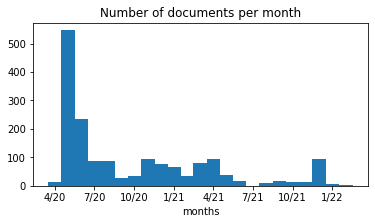

In [18]:
plot_months(months)

In [30]:
pd.DataFrame([{ "month": key, "count": months[key]} for key in sorted(months.keys())])

,month,count
0,202004,13
1,202005,546
2,202006,236
3,202007,86
4,202008,86
5,202009,26
6,202010,34
7,202011,94
8,202012,77
9,202101,65


In [20]:
file_types = get_file_types(file_names)

1600


In [32]:
pd.DataFrame([{"file type": key, "count": file_types[key]} for key in sorted(file_types.keys(), key=lambda k: file_types[k], reverse=True)])

,file type,count
0,Afbeelding,978
1,video,421
2,tekst,106
3,audio,92
4,Image,67
5,pdf,24


## To do

* look for author of documents
* extract text from documents
* counts words per document
* determine language of documents